In [9]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 加载训练好的XGBoost模型
model = xgb.Booster()
model.load_model("./mode/xgb_model2.json")



/root/miniconda3/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x1000 with 0 Axes>

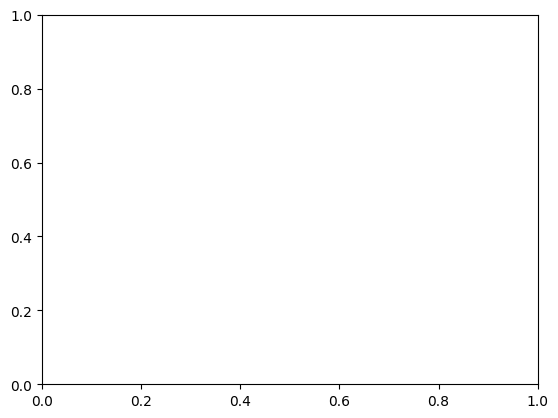

In [3]:
# 可视化第0棵树（索引从0开始）
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0)  # num_trees指定树索引
plt.title("XGBoost Decision Tree (Tree 0)")
plt.show()

<Figure size 1000x800 with 0 Axes>

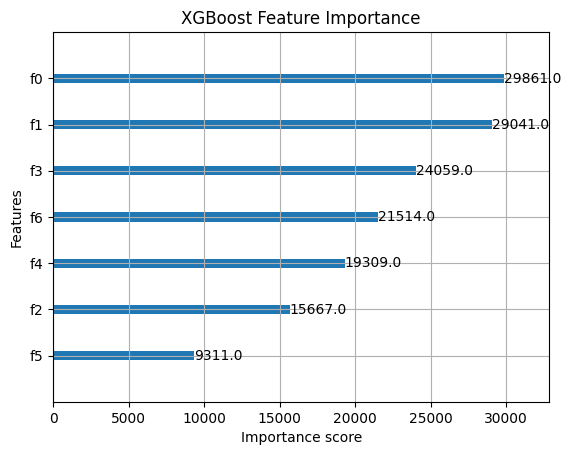

In [4]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type="weight")  # 可选: "gain", "cover"
plt.title("XGBoost Feature Importance")
plt.show()

In [5]:
import shap

# 初始化解释器
explainer = shap.TreeExplainer(model)
input_data=
# 计算SHAP值（示例输入需为二维数组）
shap_values = explainer.shap_values(input_data[feature_cols].iloc[0:1])

# 可视化单个样本的决策路径
shap.decision_plot(
    explainer.expected_value,
    shap_values[0],
    input_data[feature_cols].iloc[0],
    feature_names=feature_cols
)

NameError: name 'input_data' is not defined

/root/miniconda3/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x1000 with 0 Axes>

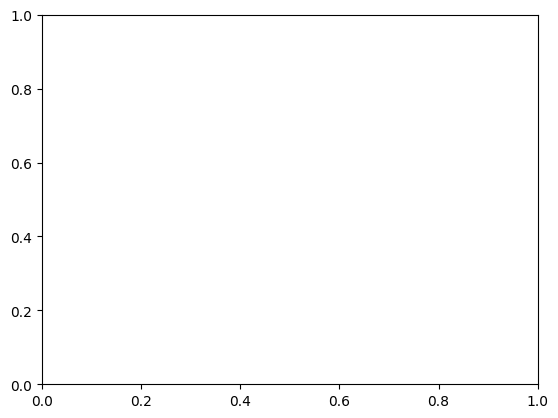

In [6]:
for i in range(3):  # 导出前3棵树
    plt.figure(figsize=(20, 10))
    plot_tree(model, num_trees=i)
    plt.title(f"Tree {i}")
    plt.savefig(f"tree_{i}.png")
    plt.close()

In [10]:
from onnxmltools.convert import convert_xgboost
from onnxconverter_common.data_types import FloatTensorType

# 定义输入类型（假设输入为10维特征）
initial_type = [("input", FloatTensorType([None, 10]))]
onnx_model = convert_xgboost(model, initial_types=initial_type)

# 保存ONNX模型
with open("xgb_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())